# <span style="color:#0b486b"> Machine Learning- Assignment Task -2 </span>

Manidhar Reddy - 
217503382

### Part-1-Data Munging

#### 1.1 :

In [608]:
import numpy as num
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
%matplotlib inline

In [609]:
traindata = pd.read_csv("C:\Users\user\Desktop\ML python files\Assessment-task-2\data\wisconsin_data/train_wbcd.csv", delimiter=',')
#print traindata

testdata = pd.read_csv("C:\Users\user\Desktop\ML python files\Assessment-task-2\data\wisconsin_data/test_wbcd.csv", delimiter=',')
#print testdata


Printing the number of features in the dataset.

In [610]:
train_feature = traindata.iloc[:,2:32]
print "Number of features in train data are :",len(train_feature.T)

test_feature = testdata.iloc[:,2:32]
print "Number of features in test data are  :",len(test_feature.T)
train_labels =  traindata.iloc[:,1]
test_labels =  testdata.iloc[:,1]


Number of features in train data are : 30
Number of features in test data are  : 30


printing the total number of 1's and 0's in the training and testing data.

In [611]:
#Assuming B as 0's and M as 1's  
def count(labels): 
    B_count = 0
    M_count = 0
    for count in range (len(labels)):
        if train_labels[count] == 'M':
            B_count+=1
        else: 
            M_count+=1
    return B_count,M_count

B_count, M_count= count(train_labels)
print "No of 0's in train data is {}".format(B_count)
print "No of 1's in train data is {}".format(M_count)
B_count, M_count= count (test_labels)
print "No of 0's in test data is {}".format(B_count)
print "No of 1's in train data is {}".format(M_count)


No of 0's in train data is 42
No of 1's in train data is 58
No of 0's in test data is 4
No of 1's in train data is 16


Comment on class distibuton: In the rain data class distribution is slightly balanced.As we can see that occurences of both 0's and 1's are nearly 50%. Test data is unbalanced.Occurrences of 1's is high when compared to 0's.


Printing the number of features with missing entries.

In [621]:
train_wbcd = pd.read_csv('C:\Users\user\Desktop\ML python files\Assessment-task-2\data\wisconsin_data/train_wbcd.csv', delimiter=',',header=0 ).values
test_wbcd = pd.read_csv('C:\Users\user\Desktop\ML python files\Assessment-task-2\data\wisconsin_data/test_wbcd.csv',delimiter=',',header=0 ).values
x_trained=np.array(train_wbcd[0:100,2:32])
x_tested=np.array(test_wbcd[0:20,2:32])
null_train=num.count_nonzero(sum(pd.isnull(x_trained)))
print "Features with missing entries in training set: ",null_train
null_test=num.count_nonzero(sum(pd.isnull(x_tested)))
print "Features with missing entries in test set",null_test

Features with missing entries in training set:  1
Features with missing entries in test set 1


Fill the missing entries with the mean of the feature

In [558]:

train_feature ["f21"] =train_feature ["f21"].fillna(train_feature ["f21"].median() )
print "Features with missing entries in training set : ",pd.isnull(train_feature).sum().sum()

print "Median of train data feature F21 is:",train_feature ["f21"].median()
test_feature ["f21"] =test_feature ["f21"].fillna(test_feature ["f21"].median() )

print "Median of train data feature F21 is:",train_feature ["f21"].median()
print "Features with missing entries in test set : ",pd.isnull(test_feature).sum().sum()


Features with missing entries in training set :  0
Median of train data feature F21 is: 15.315
Median of train data feature F21 is: 15.315
Features with missing entries in test set :  0


Normalizing the training and testing data.

In [559]:
train_feature = scale(train_feature)
#print train_feature

In [560]:
test_feature = scale(test_feature)
#print test_feature

### 1.2 Logistic Regression

We have normalized the train and test data.Now we will be performing the logistic regression to the normalized data.<br />
L1 regularization and L2 regularization using <br/> alpha = 0.1 <br/> lambda = 0.1

In [561]:
#Logistic Regression of L1 penalty
# initialize the logisitc regression model. 
my_model1 = LogisticRegression(C=10,penalty='l1')

#Create the training/testing data and labels
Xtrain = num.array(train_feature[:,:])
ytrain = traindata.iloc[:,1]

#lb = preprocessing.LabelBinarizer()
#lb.fit(ytrain.values)

Xtest = num.array(test_feature[:,:])
ytest =  testdata.iloc[:,1]

print Xtrain.shape
print ytrain.shape
print Xtest.shape
print ytest.shape

(100L, 30L)
(100L,)
(20L, 30L)
(20L,)


In [562]:
my_model1.fit(Xtrain, ytrain.values)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [563]:
predict_label1 = my_model1.predict(Xtest)

#the original label is ytest
true_label1 = ytest.values

print "The true labels are       : {}".format(true_label1)
print
print "Model predicted labels are: {}".format(predict_label1)

The true labels are       : ['B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M']

Model predicted labels are: ['B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M']


In [564]:
print "Accuracy score is :",accuracy_score(true_label1, predict_label1)
print "Model accuracy is : {}%".format(num.round(accuracy_score(true_label1, predict_label1)*100, decimals=2))

print

print "Confusion Matrix is :"
print confusion_matrix(true_label1, predict_label1, labels=["B", "M"])
print
print "Precision score is :",precision_score(true_label1, predict_label1,labels=["B","M"],average='weighted')

print "Recall score is: ",recall_score(true_label1, predict_label1,labels=["B","M"],average='weighted')

print "F1-Score is :",f1_score(true_label1, predict_label1,average='weighted')


Accuracy score is : 0.9
Model accuracy is : 90.0%

Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9


In [565]:
#Logistic Regression of L2 penalty
my_model2 = LogisticRegression(C=10,penalty='l2')


In [566]:
my_model2.fit(Xtrain, ytrain.values)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [567]:
predict_label2 = my_model2.predict(Xtest)

#the original label is ytest
true_label2 = ytest.values

print "The true labels are       : {}".format(true_label2)
print
print "Model predicted labels are: {}".format(predict_label2)

The true labels are       : ['B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M']

Model predicted labels are: ['B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'M']


In [568]:
print accuracy_score(true_label2, predict_label2)
print "Model accuracy is: {}%".format(num.round(accuracy_score(true_label2, predict_label2)*100, decimals=2))


print "Confusion Matrix is :"
print confusion_matrix(true_label2, predict_label2, labels=["B", "M"])
print
print "Precision score is :",precision_score(true_label2, predict_label2,labels=["B","M"],average='weighted')

print "Recall score is: ",recall_score(true_label2, predict_label2,labels=["B","M"],average='weighted')

print "F1-Score is :",f1_score(true_label2, predict_label2,average='weighted')

0.9
Model accuracy is: 90.0%
Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9


#### 1.3 Choosing the correct hyper parameter

In [569]:
def besthyperparameter(val,regularization):
    trials=100
    c_val = 1/val
    my_model = LogisticRegression(C=c_val,penalty=regularization)
    model_accs  = num.zeros(trials)  # storing model accuracy
    #model_wts   = num.zeros([trials, 31]) # storing model weights
    
    #print train_feature
    #print traindata.iloc[:,1]
    #print num.array(train_feature.join(traindata[:,1]))
    #print train_feature
    
    for i in range(0,trials):
    
             
        Dtrain, Dval = train_test_split((num.column_stack((train_feature,(traindata.iloc[:,1])))), test_size=0.3)
    
        #print Dtrain
        #print Dval
        Xtrain = num.array(Dtrain[:, 0:30])
        ytrain = num.array(Dtrain[:,30])

        #print Xtrain
        #print ytrain
        Xval = num.array(Dval[:, 0:30])
        yval = num.array(Dval[:,30])
                
        my_model.fit(Xtrain,ytrain)
        
        ypredicts = my_model.predict(Xval)
        ytruelabels = yval
        model_accs[i]  = accuracy_score(yval, ypredicts)
        
    return num.mean(model_accs)

In [570]:
alpha_vals = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]
l1_acc = num.zeros(len(alpha_vals))
index=0

for l in alpha_vals:
    l1_acc[index] = besthyperparameter(num.float(l),'l1')
    index+=1

index = 0
for acc_val in alpha_vals:
    print "Accuracy Score when alpha is {} using L1 model is : {}".format(alpha_vals[index],l1_acc[index])
    index+=1
    
max_index_l1  = num.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
    
print "Best Alpha: {}".format(best_alpha)

Accuracy Score when alpha is 0.1 using L1 model is : 0.981333333333
Accuracy Score when alpha is 1 using L1 model is : 0.985
Accuracy Score when alpha is 3 using L1 model is : 0.972333333333
Accuracy Score when alpha is 10 using L1 model is : 0.937333333333
Accuracy Score when alpha is 33 using L1 model is : 0.588666666667
Accuracy Score when alpha is 100 using L1 model is : 0.581666666667
Accuracy Score when alpha is 333 using L1 model is : 0.580666666667
Accuracy Score when alpha is 1000 using L1 model is : 0.589333333333
Accuracy Score when alpha is 3333 using L1 model is : 0.584333333333
Accuracy Score when alpha is 10000 using L1 model is : 0.593333333333
Accuracy Score when alpha is 33333 using L1 model is : 0.571
Best Alpha: 1


#### Comments on Under fitting/Over-fitting for L1 regression

We calculated the accuracy of the model using with the alpha values 0.1,1,3,10,33,100,333,1000, 3333,10000, 33333.We can observe that there is a raise in the accuracy score. But at caertain point where alpha= 3 the accuracy score will drops from 98.5% to 97% indicating that this model is responding highly for smaller change which shows that the model is overfitting


In [571]:
lambda_vals = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]
l2_acc = num.zeros(len(lambda_vals))
index=0

for l in lambda_vals:
    l2_acc[index] = besthyperparameter(num.float(l),'l2')
    index+=1

index = 0
for acc_val in lambda_vals:
    print "Accuracy Score when lambda is {} using L2 model is : {}".format(lambda_vals[index],l2_acc[index])
    index+=1
    
max_index_l2  = num.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
    
print "Best Lambda: {}".format(best_lambda)

Accuracy Score when lambda is 0.001 using L2 model is : 0.989333333333
Accuracy Score when lambda is 0.003 using L2 model is : 0.989666666667
Accuracy Score when lambda is 0.01 using L2 model is : 0.992
Accuracy Score when lambda is 0.03 using L2 model is : 0.991666666667
Accuracy Score when lambda is 0.1 using L2 model is : 0.991333333333
Accuracy Score when lambda is 0.3 using L2 model is : 0.992666666667
Accuracy Score when lambda is 1 using L2 model is : 0.991333333333
Accuracy Score when lambda is 3 using L2 model is : 0.99
Accuracy Score when lambda is 10 using L2 model is : 0.986333333333
Accuracy Score when lambda is 33 using L2 model is : 0.979
Best Lambda: 0.3


#### Comments on Under fitting/Over-fitting for L2 regression

We calculated the accuracy of the model using with the alpha values 0.001, 0.003, 0.01, 0.03,0.1,0.3,1,3,10,33.We can observe that there is a constant in the accuracy score. But at caertain point where alpha=0.3  the accuracy score will increased slightly. The complexity of the model is increasing but accuracy is increasing very slightly which indicating that this model is  overfitting


In [572]:
def retrainModel(val,regularization):
    
    c_val=num.float(1/val)
    my_model = LogisticRegression(C=c_val,penalty=regularization)

    #Create the training/testing data and labels
    Xtrain = num.array(train_feature[:,:])
    ytrain = traindata.iloc[:,1]

    Xtest = num.array(test_feature[:,:])
    ytest = testdata.iloc[:,1]
    
    my_model.fit(Xtrain, ytrain.values)
    
    predict_label = my_model.predict(Xtest)

    #the original label is ytest
    true_label = ytest.values

    model_weights   = my_model.coef_
    weights = ((num.argsort(model_weights))[0])[::-1]
    
    print accuracy_score(true_label, predict_label)
    print "Model accuracy is: {}%".format(num.round(accuracy_score(true_label, predict_label)*100, decimals=2))

    print "Confusion Matrix is :"
    print confusion_matrix(true_label, predict_label, labels=["B", "M"])
    print
    print "Precision score is :",precision_score(true_label, predict_label,labels=["B","M"],average='weighted')

    print "Recall score is: ",recall_score(true_label, predict_label,labels=["B","M"],average='weighted')

    print "F1-Score is :",f1_score(true_label, predict_label,average='weighted')
    print
    print "Top 5 features selected in decreasing order of feature weights are:"
    print weights[0:5]+1

In [573]:
retrainModel(best_alpha,'l1')

0.95
Model accuracy is: 95.0%
Confusion Matrix is :
[[14  0]
 [ 1  5]]

Precision score is : 0.953333333333
Recall score is:  0.95
F1-Score is : 0.948589341693

Top 5 features selected in decreasing order of feature weights are:
[23 21 22 25  8]


In [574]:
retrainModel(best_lambda,'l2')

0.9
Model accuracy is: 90.0%
Confusion Matrix is :
[[13  1]
 [ 1  5]]

Precision score is : 0.9
Recall score is:  0.9
F1-Score is : 0.9

Top 5 features selected in decreasing order of feature weights are:
[22  2 25 21 23]


## Part 2-Multi-class classification
2.1 creating a default One-vs-Rest Classifier

In [575]:
data = pd.read_csv("C:\Users\user\Desktop\ML python files\Assessment-task-2\data/mnist/reduced_mnist.csv", delimiter=',')
print "Number of data points are :", len(data)

data_feature = data.iloc[:,1:]
print "Total Number of features in data are :",len(data_feature.T)

unique_labels = num.unique(data.iloc[:,0])
print "Unique labels in the data are :", unique_labels

Number of data points are : 2520
Total Number of features in data are : 784
Unique labels in the data are : [0 1 2 3 4 5 6 7 8 9]


In [576]:
msk = num.random.rand(len(data)) < 0.7

train = data[msk]

test = data[~msk]

print len(train)
print len(test)

1766
754


In [577]:
def onevsrestClassifier(val):
    c_val=num.float(1/val)
    my_model = LogisticRegression(C=c_val,penalty='l1')

    #Create the training/testing data and labels
    Xtrain = train.iloc[:,:]
    ytrain = train.iloc[:,0]

    #lb = preprocessing.LabelBinarizer()
    #lb.fit(ytrain.values)

    Xtest = test.iloc[:,:]
    ytest = test.iloc[:,0]
    
    my_model.fit(Xtrain.values, ytrain.values)
    
    predict_label = my_model.predict(Xtest)

    #the original label is ytest
    true_label = ytest.values
    
    print accuracy_score(true_label, predict_label)
    print "Model accuracy is: {}%".format(num.round(accuracy_score(true_label, predict_label)*100, decimals=2))

    print "Confusion Matrix is :"
    print confusion_matrix(true_label, predict_label)
    print
    print "Precision score is :",precision_score(true_label, predict_label,average='weighted')

    print "Recall score is: ",recall_score(true_label, predict_label,average='weighted')

In [578]:
onevsrestClassifier(1)

0.839522546419
Model accuracy is: 83.95%
Confusion Matrix is :
[[62  0  1  3  0  1  1  0  4  0]
 [ 0 87  0  0  0  2  0  0  0  0]
 [ 0  1 54  2  2  1  5  1  6  0]
 [ 0  2  2 70  0  6  0  0  1  0]
 [ 1  0  1  1 58  1  1  0  1  3]
 [ 3  0  0  6  1 54  3  0  4  1]
 [ 1  0  1  0  0  0 63  0  5  0]
 [ 0  1  5  2  2  0  0 70  6  1]
 [ 1  7  3  2  0  3  0  0 55  1]
 [ 1  0  0  1  5  1  1  2  1 60]]

Precision score is : 0.844280698491
Recall score is:  0.839522546419


### 2.2 Choosing the best hyper-parameter

In [579]:
def choosebestvalhyperparameter(val):
    trials=10
    c_val = 1/val
    my_model = LogisticRegression(C=c_val,penalty='l1')
    model_accs  = num.zeros(trials)  # storing model accuracy
      
    for i in range(0,trials):
        Dtrain, Dval = train_test_split(train.iloc[:,:], test_size=0.3)
    
        #print Dtrain
        #print Dval
        Xtrain = Dtrain.iloc[:, 1:]
        ytrain = Dtrain.iloc[:,0]

        #print Xtrain
        #print ytrain
        Xval = Dval.iloc[:, 1:]
        yval = Dval.iloc[:,0]
        
        my_model.fit(Xtrain,ytrain)
        
        ypredicts = my_model.predict(Xval)
        ytruelabels = yval
        model_accs[i]  = accuracy_score(ytruelabels, ypredicts)
        
    return num.mean(model_accs)

In [580]:
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]

l1_val_acc = num.zeros(len(alpha_vals))
index=0

for l in alpha_vals:
    l1_val_acc[index] = choosebestvalhyperparameter(num.float(l))
    index+=1

index = 0
for acc_val in alpha_vals:
    print "Accuracy Score when alpha is {} using L1 model is : {}".format(alpha_vals[index],l1_val_acc[index])
    index+=1
    
max_index_l1_val  = num.argmax(l1_val_acc)
best_val_alpha = alpha_vals[max_index_l1_val]
    
print "Best Alpha: {}".format(best_val_alpha)

Accuracy Score when alpha is 0.1 using L1 model is : 0.843396226415
Accuracy Score when alpha is 1 using L1 model is : 0.840377358491
Accuracy Score when alpha is 3 using L1 model is : 0.842075471698
Accuracy Score when alpha is 10 using L1 model is : 0.830754716981
Accuracy Score when alpha is 33 using L1 model is : 0.837547169811
Accuracy Score when alpha is 100 using L1 model is : 0.856037735849
Accuracy Score when alpha is 333 using L1 model is : 0.866603773585
Accuracy Score when alpha is 1000 using L1 model is : 0.852641509434
Accuracy Score when alpha is 3333 using L1 model is : 0.806226415094
Accuracy Score when alpha is 10000 using L1 model is : 0.70679245283
Accuracy Score when alpha is 33333 using L1 model is : 0.542264150943
Best Alpha: 333


In [581]:
def choosebesttrainhyperparameter(val):
    trials=10
    c_val = 1/val
    my_model = LogisticRegression(C=c_val,penalty='l1')
    model_accs  = num.zeros(trials)  # storing model accuracy
        
    for i in range(0,trials):
        Dtrain, Dval = train_test_split(data.iloc[:,:], test_size=0.3)
    
        Xtrain = Dtrain.iloc[:, 1:]
        ytrain = Dtrain.iloc[:,0]

        Xtest = Dval.iloc[:, 1:]
        ytest = Dval.iloc[:,0]
                
        my_model.fit(Xtrain,ytrain)
        
        ypredicts = my_model.predict(Xtest)
        ytruelabels = ytest
        model_accs[i]  = accuracy_score(ytruelabels, ypredicts)
        
    return num.mean(model_accs)

In [582]:
alpha_vals = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]

l1_train_acc = num.zeros(len(alpha_vals))
index=0

for l in alpha_vals:
    l1_train_acc[index] = choosebesttrainhyperparameter(num.float(l))
    index+=1

index = 0
for acc_val in alpha_vals:
    print "Accuracy Score when alpha is {} using L1 model is : {}".format(alpha_vals[index],l1_train_acc[index])
    index+=1
    
max_index_l1_train  = num.argmax(l1_train_acc)
best_train_alpha = alpha_vals[max_index_l1_train]
    
print "Best Alpha: {}".format(best_train_alpha)

Accuracy Score when alpha is 0.1 using L1 model is : 0.831613756614
Accuracy Score when alpha is 1 using L1 model is : 0.832407407407
Accuracy Score when alpha is 3 using L1 model is : 0.839285714286
Accuracy Score when alpha is 10 using L1 model is : 0.838888888889
Accuracy Score when alpha is 33 using L1 model is : 0.843518518519
Accuracy Score when alpha is 100 using L1 model is : 0.856878306878
Accuracy Score when alpha is 333 using L1 model is : 0.869708994709
Accuracy Score when alpha is 1000 using L1 model is : 0.86044973545
Accuracy Score when alpha is 3333 using L1 model is : 0.833862433862
Accuracy Score when alpha is 10000 using L1 model is : 0.73544973545
Accuracy Score when alpha is 33333 using L1 model is : 0.604100529101
Best Alpha: 333


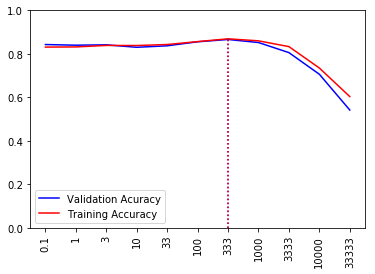

In [583]:
#plot the accuracy curve
plt.plot(range(0,len(alpha_vals)), l1_val_acc, color='b', label='Validation Acuracy')
plt.plot(range(0,len(alpha_vals)), l1_train_acc, color='r', label='Training Accuracy')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(alpha_vals)), alpha_vals, rotation='vertical') 

#Highlight the best values of alpha and lambda
plt.plot((max_index_l1_val, max_index_l1_val), (0, l1_val_acc[max_index_l1_val]), ls='dotted', color='b')
plt.plot((max_index_l1_train, max_index_l1_train), (0, l1_train_acc[max_index_l1_train]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")

The above graph represents the graph for validation accuracy and training accuracy. Accuracy score is constant for the alpha values till alpha=333.From there the accuracy score is decreasing for the increase in alpha values which indicates the region of overfitting.  

#### We got the best alpha values from the above computation and now we will evaluate the performance on the test data and find 
1. Number of non-zero features
2. Confusion matrix
3. Precision
4. Accuracy

In [584]:
def retrainfinalModel(val):
    
    c_val=num.float(1/val)
    my_model = LogisticRegression(C=c_val,penalty='l1')

    #Create the training/testing data and labels
    Xtrain = train.iloc[:,:]
    ytrain = train.iloc[:,0]

    #lb = preprocessing.LabelBinarizer()
    #lb.fit(ytrain.values)

    Xtest = test.iloc[:,:]
    ytest = test.iloc[:,0]
    
    my_model.fit(Xtrain.values, ytrain.values)
    
    predict_label = my_model.predict(Xtest)

    #the original label is ytest
    true_label = ytest.values

    print "Number of non-zero feautres are: ", num.count_nonzero(my_model.coef_)
    print

    print "Confusion Matrix is :"
    print confusion_matrix(true_label, predict_label)
    
    cm = confusion_matrix(true_label, predict_label)
    TP = num.diag(cm)
    FP = cm.sum(axis=0) - num.diag(cm)
    FN = cm.sum(axis=1) - num.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    i = 0
    
    precision = []
    recall = []
    accuracy = []
    
    while i in range(0,10):
        precision.append(float(TP[i])/float(TP[i] + FP[i]))
        recall.append(float(TP[i])/float(TP[i]+FN[i]))
        accuracy.append(float(TP[i] + TN[i])/float(TP[i]+TN[i]+FP[i]+FN[i])*100)
        i+=1
    
    i=0
    print
    print "Labels                    Precision                        Recall                               Accuracy"
    while i in range(0,10):
           print "{}                        {}                   {}                        {}" .format(i,precision[i],recall[i],accuracy[i])
           print
           i+=1

In [585]:
retrainfinalModel(num.float(best_alpha))

Number of non-zero feautres are:  2588

Confusion Matrix is :
[[63  0  1  3  0  0  1  0  4  0]
 [ 0 87  0  0  0  2  0  0  0  0]
 [ 0  1 53  2  2  1  6  1  6  0]
 [ 0  1  2 71  0  6  0  0  1  0]
 [ 1  0  1  1 58  1  1  0  1  3]
 [ 3  0  0  6  1 54  3  0  4  1]
 [ 1  0  1  0  0  0 63  0  5  0]
 [ 0  1  5  2  2  0  0 71  5  1]
 [ 1  5  3  2  0  4  0  0 55  2]
 [ 1  0  0  1  5  1  1  1  2 60]]

Labels                    Precision                        Recall                               Accuracy
0                        0.9                   0.875                        97.8779840849

1                        0.915789473684                   0.977528089888                        98.6737400531

2                        0.80303030303                   0.736111111111                        95.7559681698

3                        0.806818181818                   0.876543209877                        96.4190981432

4                        0.852941176471                   0.865671641791      

#### Comments on Over-fitting/ Under fitting
We can observe that for alpha values  0.1,1,3,10,33,100,333,1000,3333,10000,33333 we can observe that there is a raise in the accuracy score of training data and validation data. But there is a sudden drop in accuracy from 86% to 82% when alpha = 3333. It is indicating that model is reponding highly for smaller change in the alpha value. So this model is overfitting.  